In [29]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten ,Dense
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
import os

In [30]:
train_path = "/Users/fege/Developer/deepLearning/Udemy/data_sets/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training/"
test_path = "/Users/fege/Developer/deepLearning/Udemy/data_sets/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Test/"

In [31]:
img = load_img(train_path + "Apple Braeburn 1/0_100.jpg")

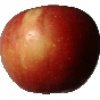

In [32]:
img

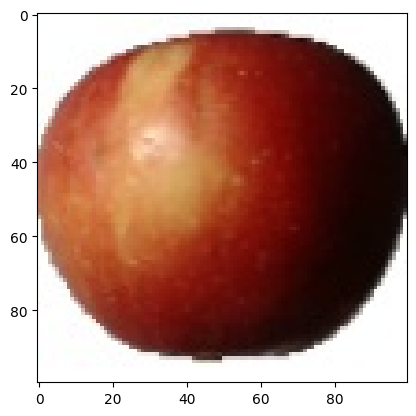

In [33]:
plt.imshow(img)


In [41]:
x = img_to_array(img)
type(x.shape)

tuple

In [36]:
ClassName = glob(train_path + '*')

In [39]:
len(ClassName)

141